In [1]:
import numpy as np
import pandas as pd
#!pip install a-world-of-countries
import awoc
#!pip install country_converter
import country_converter as coco
import matplotlib.pyplot as plt
import os
#!pip install ipyleaflet
from ipyleaflet import Map, AntPath, Icon, Marker, basemaps
import random

# Перед началом необходимо загрузить файлы: airports.csv и routes.csv в папку с кодом
Или указать путь к файлам в = pd.read_csv()

In [2]:
columns = ["Airport ID", "Name", "City", "Country", "IATA", "ICAO","Latitude", "Longitude",
           "Altitude","Timezone", "DST", "Tz database time zone", "Type", "Source"]
airport = pd.read_csv("airports.csv", index_col = 0,
                      names = columns).reset_index(drop = True).replace("\\N", np.nan) #columns = columns
airport.tail()

,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
7693,Rogachyovo Air Base,Belaya,Russia,NaN,ULDA,71.616699,52.478298,272,NaN,NaN,NaN,airport,OurAirports
7694,Ulan-Ude East Airport,Ulan Ude,Russia,NaN,XIUW,51.849998,107.737999,1670,NaN,NaN,NaN,airport,OurAirports
7695,Krechevitsy Air Base,Novgorod,Russia,NaN,ULLK,58.625000,31.385000,85,NaN,NaN,NaN,airport,OurAirports
7696,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,NaN,NaN,NaN,airport,OurAirports
7697,Melitopol Air Base,Melitopol,Ukraine,NaN,UKDM,46.880001,35.305000,0,NaN,NaN,NaN,airport,OurAirports


In [3]:
iata = airport[~airport["IATA"].isna()].copy()
iata.head()

,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
0,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [4]:
columns = ["Airline", "Airline ID", "Source airport", "Source airport ID", "Destination airport", 
           "Destination airport ID", "Codeshare", "Stops", "Equipment"]
routes = pd.read_csv("routes.csv", index_col = 0,
                      names = columns).reset_index(drop = True).replace("\\N", np.nan)

In [5]:
routes.head()

,Airline ID,Source airport,Source airport ID,Destination airport,Destination airport ID,Codeshare,Stops,Equipment
0,410,AER,2965,KZN,2990,NaN,0,CR2
1,410,ASF,2966,KZN,2990,NaN,0,CR2
2,410,ASF,2966,MRV,2962,NaN,0,CR2
3,410,CEK,2968,KZN,2990,NaN,0,CR2
4,410,CEK,2968,OVB,4078,NaN,0,CR2


In [6]:
departure = routes[["Source airport", "Destination airport"]].groupby("Source airport").count()
arival = routes[["Source airport", "Destination airport"]].groupby("Destination airport").count()
tablo = departure.join(arival, how = "outer").fillna(0).astype(int) # .astype(int) - быстро найти НА
tablo["Sum"] = tablo["Source airport"] + tablo["Destination airport"]
tablo.head()

,Destination airport,Source airport,Sum
AAE,9,9,18
AAL,20,21,41
AAN,2,2,4
AAQ,3,3,6
AAR,8,8,16


In [7]:
df = pd.merge(airport, tablo, left_on = "IATA", right_index = True, how = "outer")
df.tail()

,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source,Destination airport,Source airport,Sum
NaN,NaN,NaN,NaN,XEQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0
NaN,NaN,NaN,NaN,YKT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0
NaN,NaN,NaN,NaN,ZBL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0
NaN,NaN,NaN,NaN,ZDY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0
NaN,NaN,NaN,NaN,ZEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,6.0


In [8]:
df[df["Name"].isna()].nlargest(3, columns = "Sum")

,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source,Destination airport,Source airport,Sum
NaN,NaN,NaN,NaN,INC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0,66.0,131.0
NaN,NaN,NaN,NaN,NTG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,36.0
NaN,NaN,NaN,NaN,MRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,24.0


В ходе работы мы выяснили, что минимальное количество взлёт посадок в наших данных, больше, чем у самого "крупнейшего" аэропорта с неизвестным именем и координатами. Поэтому считаю нерациональным заполнять  данные вручную. Для дальнейшей работы можно использовать обединение inner

In [9]:
network = pd.merge(airport, tablo, left_on = "IATA", right_index = True, how = "inner")
network.tail()

,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source,Destination airport,Source airport,Sum
7649,La Araucanía Airport,Temuco,Chile,ZCO,SCQP,-38.925900,-72.651500,333,-3,S,NaN,airport,OurAirports,3,3,6
7654,New Islamabad International Airport,Islamabad,Pakistan,ISB,OPIS,33.560713,72.851613,1646,5,U,NaN,airport,OurAirports,58,59,117
7682,Songwe Airport,Mbeya,Tanzania,MBI,HTGW,-8.919942,33.273981,4412,NaN,NaN,NaN,airport,OurAirports,1,1,2
7689,Laguindingan Airport,Cagayan de Oro City,Philippines,CGY,RPMY,8.612203,124.456496,190,NaN,NaN,NaN,airport,OurAirports,7,7,14
7696,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,NaN,NaN,NaN,airport,OurAirports,4,4,8


In [10]:
world = awoc.AWOC()
cc = coco.CountryConverter()

In [11]:
def country2continent(country_name):
    try: continent_name = world.get_country_continent_name(country_name)
    except NameError:
        continent_name = cc.convert(names = country_name, to = 'continent')
    return continent_name

In [12]:
network["Continent"] = network["Country"].map(lambda x: country2continent(x))

Virgin Islands not found in regex
Virgin Islands not found in regex
Virgin Islands not found in regex


In [13]:
idx = network[network["Continent"] == "not found"].Continent.index
network.loc[idx, "Continent"] = "North America"

In [14]:
continents = network[["Continent", "Sum"]].groupby("Continent").sum().nlargest(6, columns = "Sum").index

Сгрупперуем данные по Континенту и сохраним с 3 крупнейшими аэропортами на нём.

In [15]:
largest = network[network["Continent"].isin(continents)].groupby("Continent").apply(lambda x : 
    x.nlargest(3, columns = "Sum"))[["Continent", "Name", "IATA", "Sum", "Latitude", "Longitude"]].reset_index(drop = True).set_index(["Continent", "Name"])
largest

IATA   Sum  \
Continent     Name                                                            
Africa        OR Tambo International Airport                      JNB   321   
              Cairo International Airport                         CAI   303   
              Jomo Kenyatta International Airport                 NBO   258   
Asia          Beijing Capital International Airport               PEK  1069   
              Shanghai Pudong International Airport               PVG   825   
              Singapore Changi Airport                            SIN   820   
Europe        London Heathrow Airport                             LHR  1051   
              Charles de Gaulle International Airport             CDG  1041   
              Frankfurt am Main Airport                           FRA   990   
North America Hartsfield Jackson Atlanta International Airport    ATL  1826   
              Chicago O'Hare International Airport                ORD  1108   
              Los Angeles International Airport                   LAX   990   
Oceania       Sydney Kingsford Smith International Airport        SYD   410   
              Brisbane International Airport                      BNE   296   
              Melbourne International Airport                     MEL   269   
South America Guarulhos - Governador André Franco Montoro Int...  GRU   387   
              El Dorado International Airport                     BOG   307   
              Jorge Chávez International Airport                  LIM   230   

                                                                   Latitude  \
Continent     Name                                                            
Africa        OR Tambo International Airport                     -26.139200   
              Cairo International Airport                         30.121901   
              Jomo Kenyatta International Airport                 -1.319240   
Asia          Beijing Capital International Airport               40.080101   
              Shanghai Pudong International Airport               31.143400   
              Singapore Changi Airport                             1.350190   
Europe        London Heathrow Airport                             51.470600   
              Charles de Gaulle International Airport             49.012798   
              Frankfurt am Main Airport                           50.033333   
North America Hartsfield Jackson Atlanta International Airport    33.636700   
              Chicago O'Hare International Airport                41.978600   
              Los Angeles International Airport                   33.942501   
Oceania       Sydney Kingsford Smith International Airport       -33.946098   
              Brisbane International Airport                     -27.384199   
              Melbourne International Airport                    -37.673302   
South America Guarulhos - Governador André Franco Montoro Int... -23.435556   
              El Dorado International Airport                      4.701590   
              Jorge Chávez International Airport                 -12.021900   

                                                                   Longitude  
Continent     Name                                                            
Africa        OR Tambo International Airport                       28.246000  
              Cairo International Airport                          31.405600  
              Jomo Kenyatta International Airport                  36.927799  
Asia          Beijing Capital International Airport               116.584999  
              Shanghai Pudong International Airport               121.805000  
              Singapore Changi Airport                            103.994003  
Europe        London Heathrow Airport                              -0.461941  
              Charles de Gaulle International Airport               2.550000  
              Frankfurt am Main Airport                             8.570556  
North America Hartsfield Jackson A

Выберем случано 2 континента и сохраним их IATA

In [29]:
#np.random.seed(42) # Закоментируйте, эту строчку для выбора "случайного" континента
cont = list(continents)
element = random.choice(cont)
cont.remove(element)
element_2 = random.choice(cont)

In [30]:
df_r = largest.loc[[element, element_2]]
iata_arr = df_r.loc[element].IATA.values
iata_des = df_r.loc[element_2].IATA.values

Посчитаем связи между аэропортами, нулевые значения заменяем на 0.0001, что позволит избежать ошибок, но не повредит информативности визуализации.

In [31]:
arr_all = []
x = 0
while x != 3:
    arr_1 = []
    for i in iata_arr:
        if ((routes["Source airport"] == i) & (routes["Destination airport"] == iata_des[x])).sum() == 0:
            arr_1.append(0.0001)
        else:
            arr_1.append(((routes["Source airport"] == i) & (routes["Destination airport"] == iata_des[x])).sum())
    x+=1
    arr_all.append(arr_1)

Изобразим и сохраним в формате .png доли прилётов в виде диаграм с IATA места назначения, для использования на карте.

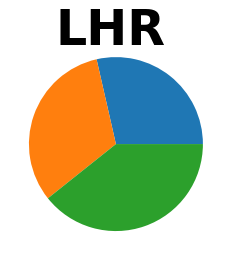

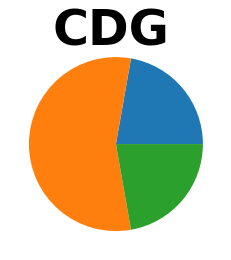

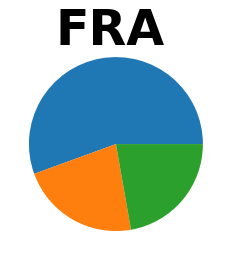

In [32]:
path_png = []
temp = zip(arr_all, iata_des)
for i, y in temp:
    fig, ax = plt.subplots()
    plt.suptitle(y, fontsize = 49, fontweight = "bold")
    ax.pie(i);
    fig.savefig("airport_"+str(i)+".png")
    path_png.append("airport_"+str(i)+".png")

Создадим значение, которое будет необходимо, для вызова предупредения в случае, если между 3 крупнейшими аэропортами одного континента не будет рейсов в 3 крупнейших аэропорта другого континента.

In [33]:
i = 0
test = 0
while i !=3:
    test += sum(arr_all[i])
    i+=1

Сохраним координаты аэропортов оправления и прибытия.

In [34]:
dep_three = pd.DataFrame(df_r["Longitude"].values[0:3], df_r["Latitude"].values[0:3]).reset_index()
arr_three = pd.DataFrame(df_r["Longitude"].values[3:6], df_r["Latitude"].values[3:6]).reset_index()

Создадим список списков с долями прилётов из аэропортов отправления.

In [35]:
pie_list_fin = []
i=0
while i!=3:
    k=0
    pie_list = []
    while k!=3:
        pie_list.append(int((round(arr_all[i][k]/sum(arr_all[i]), 2))*100))
        k+=1
    pie_list_fin.append(pie_list)
    i+=1

Создадим список списков с названиями аэропортов отправления с их долями в % по пунктам назначения.

In [36]:
list_aero_text = []
i=0
while i != 3:
    k=0
    temp = []
    while k != 3:
        temp.append(network[network["IATA"].isin(iata_arr)].Name.values[k] +" --- " + str(pie_list_fin[i][k])+"%")
        k+=1
    list_aero_text.append(temp)
    i+=1
list_aero_text

[['Los Angeles International Airport --- 28%',
  'Hartsfield Jackson Atlanta International Airport --- 32%',
  "Chicago O'Hare International Airport --- 39%"],
 ['Los Angeles International Airport --- 22%',
  'Hartsfield Jackson Atlanta International Airport --- 56%',
  "Chicago O'Hare International Airport --- 22%"],
 ['Los Angeles International Airport --- 56%',
  'Hartsfield Jackson Atlanta International Airport --- 22%',
  "Chicago O'Hare International Airport --- 22%"]]

Виуализируем на интерактивной карте взаимосвязи между аэропортами и укажем доли пунктах назначения.

### При наведении курсора на аэропорт, окрывается дополнительная информация

In [38]:
color = ['#7590ba', '#e28b00', '#7fff00']
if test != 0.0009000000000000001:
    x = 0
    y = 0
    m = Map(center=(55.755864, 37.617698), zoom=2, world_copy_jump=True, title = "fsdf")

    while x != 3:
        while y != 3:
            if arr_all[y][x] != 0.0001:
                ant_path = AntPath(
                    locations=[
                    dep_three.iloc[x].values.tolist(),
                    arr_three.iloc[y].values.tolist()],
                    dash_array=[1, 50],
                    delay=300,
                    color=color[x],
                    pulse_color='#3f6fba')
                m.add_layer(ant_path)
                
                icon = Icon(icon_url=path_png[y], icon_size=[60, 60], icon_anchor=[22,22])
                mark = Marker(location=list(largest[["Latitude","Longitude"]][largest["IATA"] == iata_des[y]].values[:][0]),
                              icon=icon, draggable=False,сlickable=True,rotation_origin='22px 22px',
                              title = network[network["IATA"] == iata_des[y]].Name.values[0]
                              + "\nДоля рейсов из аэропортов:"+"\n"
                              +str(list_aero_text[x]))
                icon = Icon(icon_url="https://ot-vinta.org/wp-content/uploads/2019/07/plane-1-header.png",
                            icon_size=[30, 30], icon_anchor=[22,22])
                mark_arr = Marker(location=list(largest[["Latitude","Longitude"]][largest["IATA"] == iata_arr[x]].values[:][0]),
                              icon=icon, draggable=False,сlickable=True,rotation_origin='22px 22px',
                              title = network[network["IATA"] == iata_arr[y]].Name.values[0])
                m.add_layer(mark)
                m.add_layer(mark_arr)
            y+=1        
        y = 0
        x+=1
else:
    print("Между 3 крупнейшими аэропортами выбранных континентов нет рейсов.")
    print("Континент вылета "+element+"\nКонтинент прилёта "+element_2+".")
    sys.exit("Сгенерируйте новую пару");
m

Map(center=[55.755864, 37.617698], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…

Код в блоке ниже необходим для удаления png файлов используемых для отображения диаграмм.

In [39]:
# for i in path_png:
#     os.remove(i)

Альтернативное изображение самолёта

In [40]:
plane = "https://www.clipartmax.com/png/full/253-2530688_airplane-take-off-comments-airplane-icon-png-free.png"